# Importing Libraries

In [1]:
from PAS_Learn.Classifier import GaussianNaiveBayes
from PAS_Learn.model_selection import My_train_test_split
from PAS_Learn.metrics import Evaluate

import pandas as pd


# Reading Data

In [2]:
df = pd.read_csv('mushroom_cleaned.csv')
df.head()


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [3]:
len(df['cap-diameter'].unique())

1847

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


# Spliting to Features and Label

In [5]:
X, y = df.drop('class', axis=1), df['class']

# Spliting to train and test datasets

In [6]:
X_train, X_test, y_train, y_test = My_train_test_split(X, y, test_size=0.2, random_state=25)


# Training the model

In [7]:
AI_Model = GaussianNaiveBayes()
AI_Model.fit(X_train, y_train)
y_pred = AI_Model.predict(X_test)


# Final Evaluation

In [8]:
Evaluate(y_test, y_pred, y.unique())

Accuracy: 63.46%
Precision: 64.95%
Recall: 71.56%
F1 Score: 68.09%
Confusion Matrix:
+----+------+------+
|    |    1 |    0 |
+====+======+======+
|  1 | 4214 | 2274 |
+----+------+------+
|  0 | 1675 | 2644 |
+----+------+------+


In [9]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [10]:
Evaluate(y_test, y_pred, ['Yes', 'No'])

Accuracy: 63.50%
Precision: 64.98%
Recall: 71.59%
F1 Score: 68.13%
Confusion Matrix:
+-----+-------+------+
|     |   Yes |   No |
+=====+=======+======+
| Yes |  4216 | 2272 |
+-----+-------+------+
| No  |  1673 | 2646 |
+-----+-------+------+


In [11]:
dict(AI_Model.class_variances)

{0: cap-diameter       124128.930729
 cap-shape               4.102532
 gill-attachment         4.749439
 gill-color             10.445309
 stem-height             0.345496
 stem-width         532209.130562
 stem-color              9.623844
 season                  0.130032
 dtype: float64,
 1: cap-diameter       127703.214385
 cap-shape               4.977864
 gill-attachment         5.117787
 gill-color              9.969315
 stem-height             0.463181
 stem-width         640966.247491
 stem-color             11.213960
 season                  0.061416
 dtype: float64}

In [12]:
AI_Model.class_priors

{0: 0.44975478856296847, 1: 0.5502452114370315}

In [13]:
for col in X.columns:
    print(col, X[col].unique())

cap-diameter [1372 1461 1371 ... 1847 1851 1885]
cap-shape [2 6 4 0 1 5 3]
gill-attachment [2 0 1 5 6 4 3]
gill-color [10  5  7  9  0  3 11  8  1  6  4  2]
stem-height [3.80746675 3.61249629 3.78757181 ... 1.95808827 1.98196221 2.01379412]
stem-width [1545 1557 1566 ... 3271 2738 2995]
stem-color [11 12  6 10  0  5  9  8  1  4  3  7  2]
season [1.80427271 0.94319455 0.88845029 0.02737213]


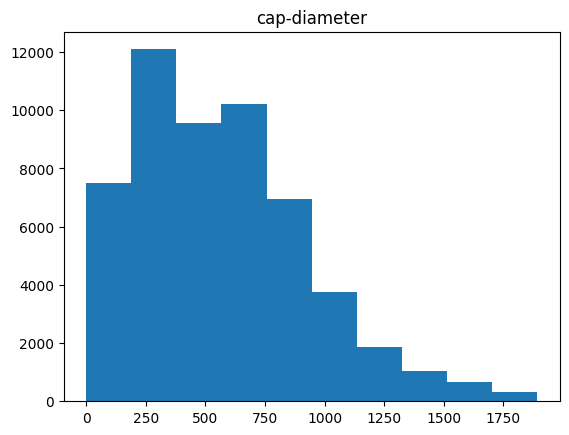

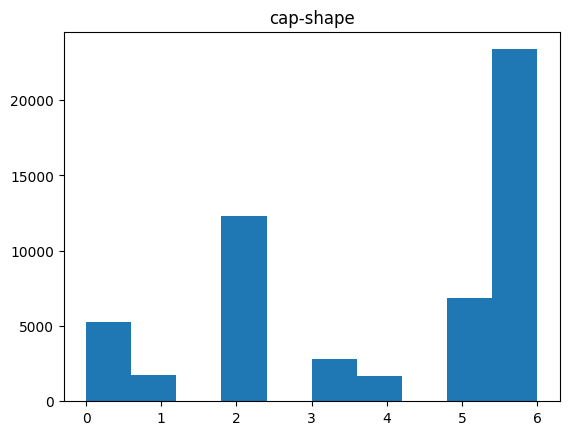

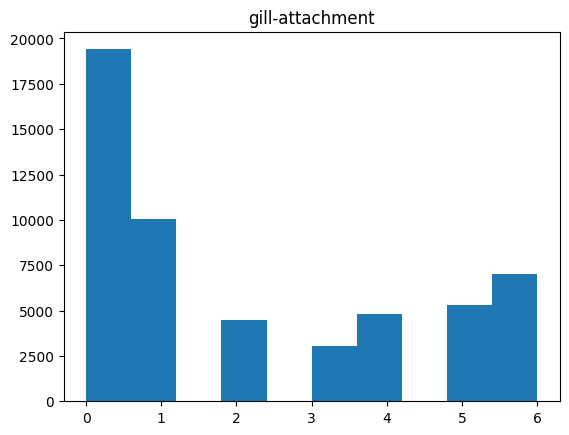

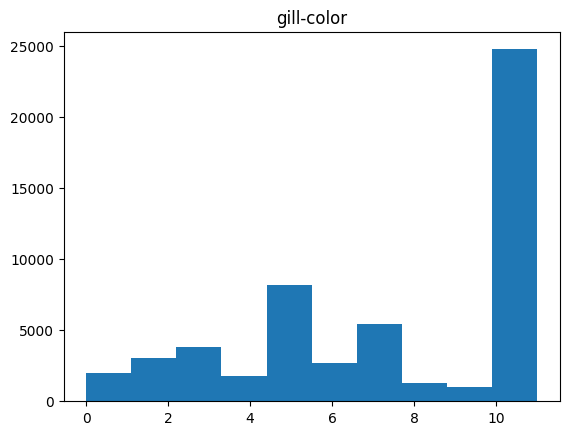

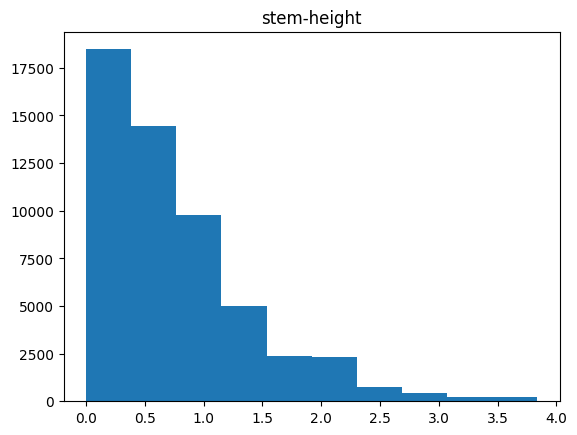

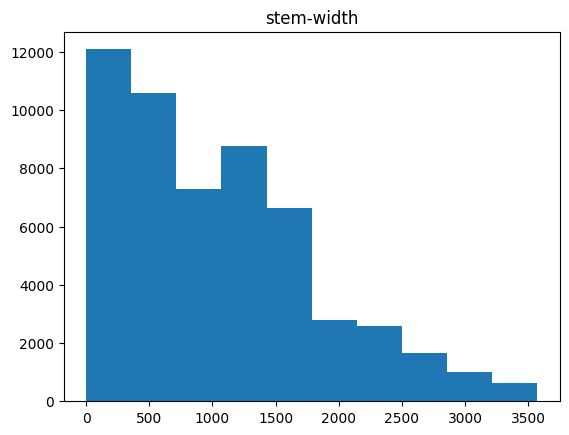

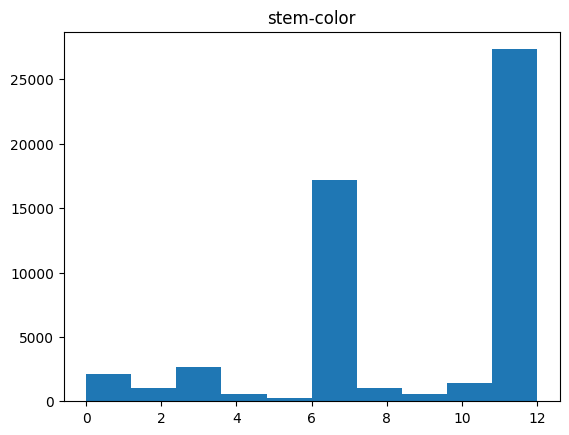

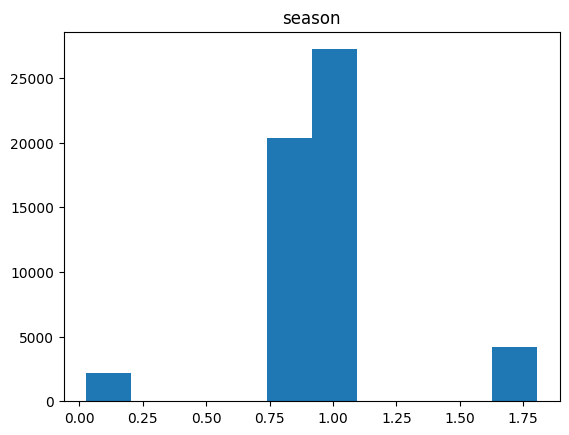

In [14]:
import matplotlib.pyplot as plt
for col in X.columns:
    plt.hist(X[col])
    plt.title(col)
    plt.show()

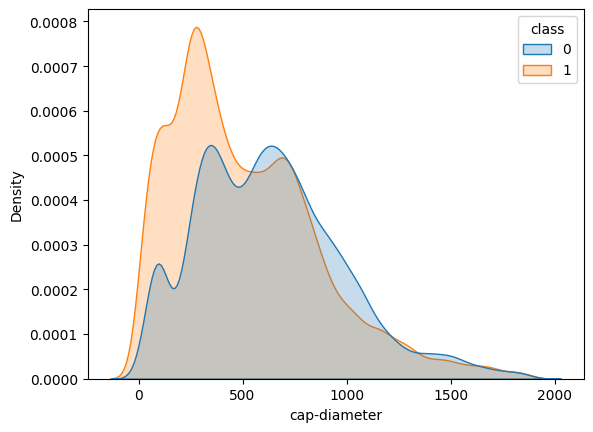

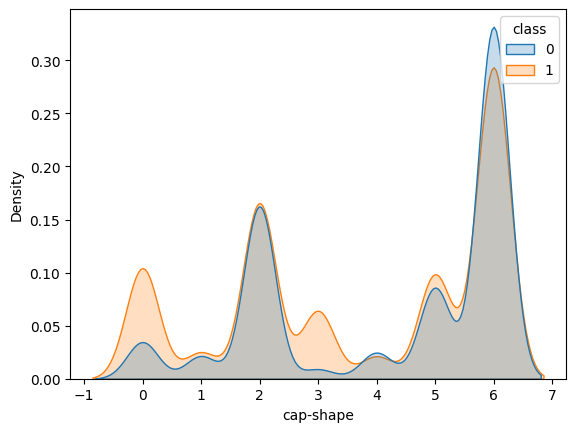

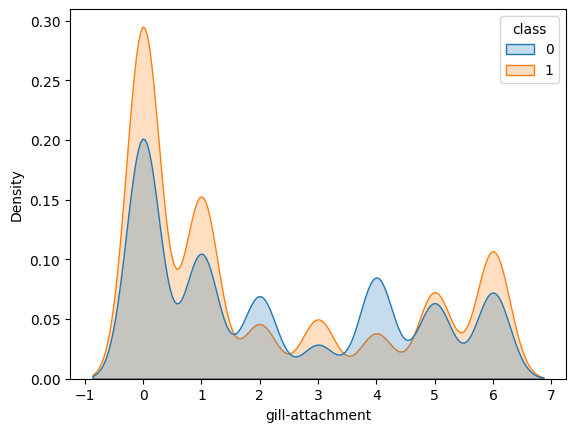

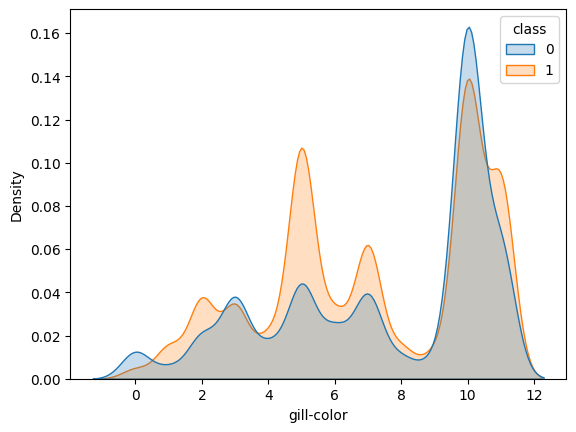

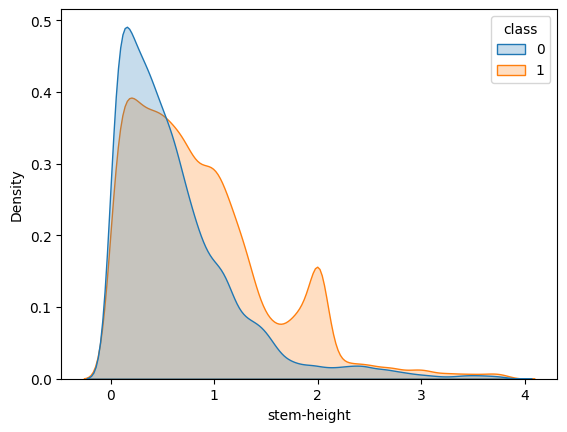

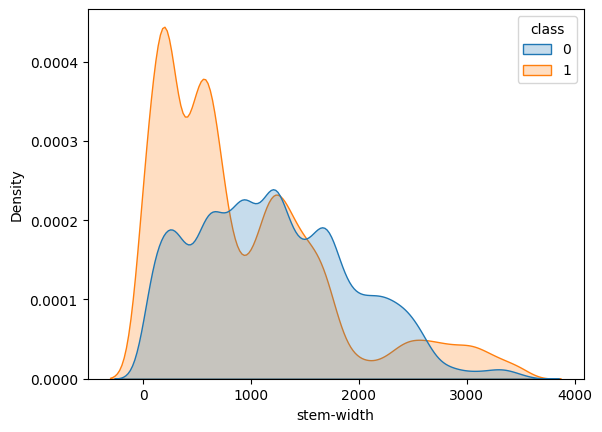

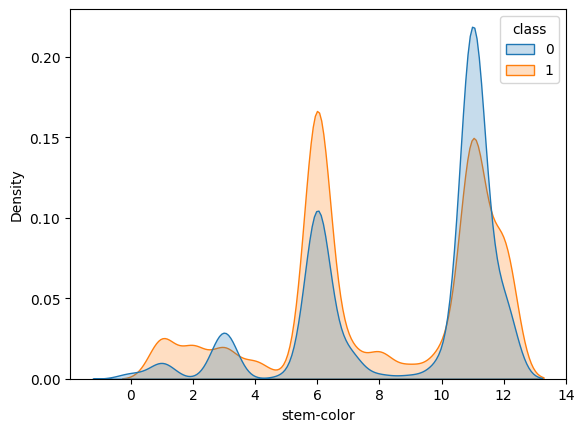

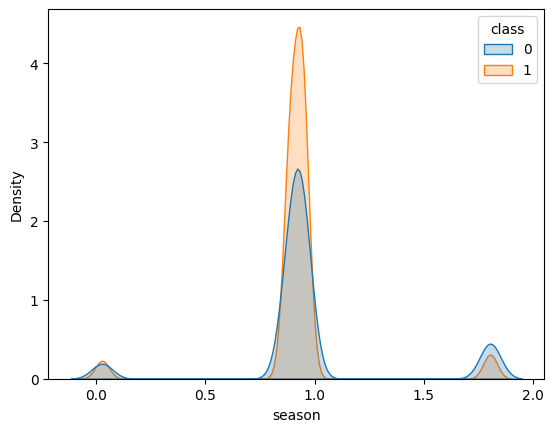

In [15]:
import seaborn as sns
# Gausssian Distirbution
for col in X.columns:
    sns.kdeplot(data=df, x=col, hue="class", fill=True, common_norm=True)
    plt.show()


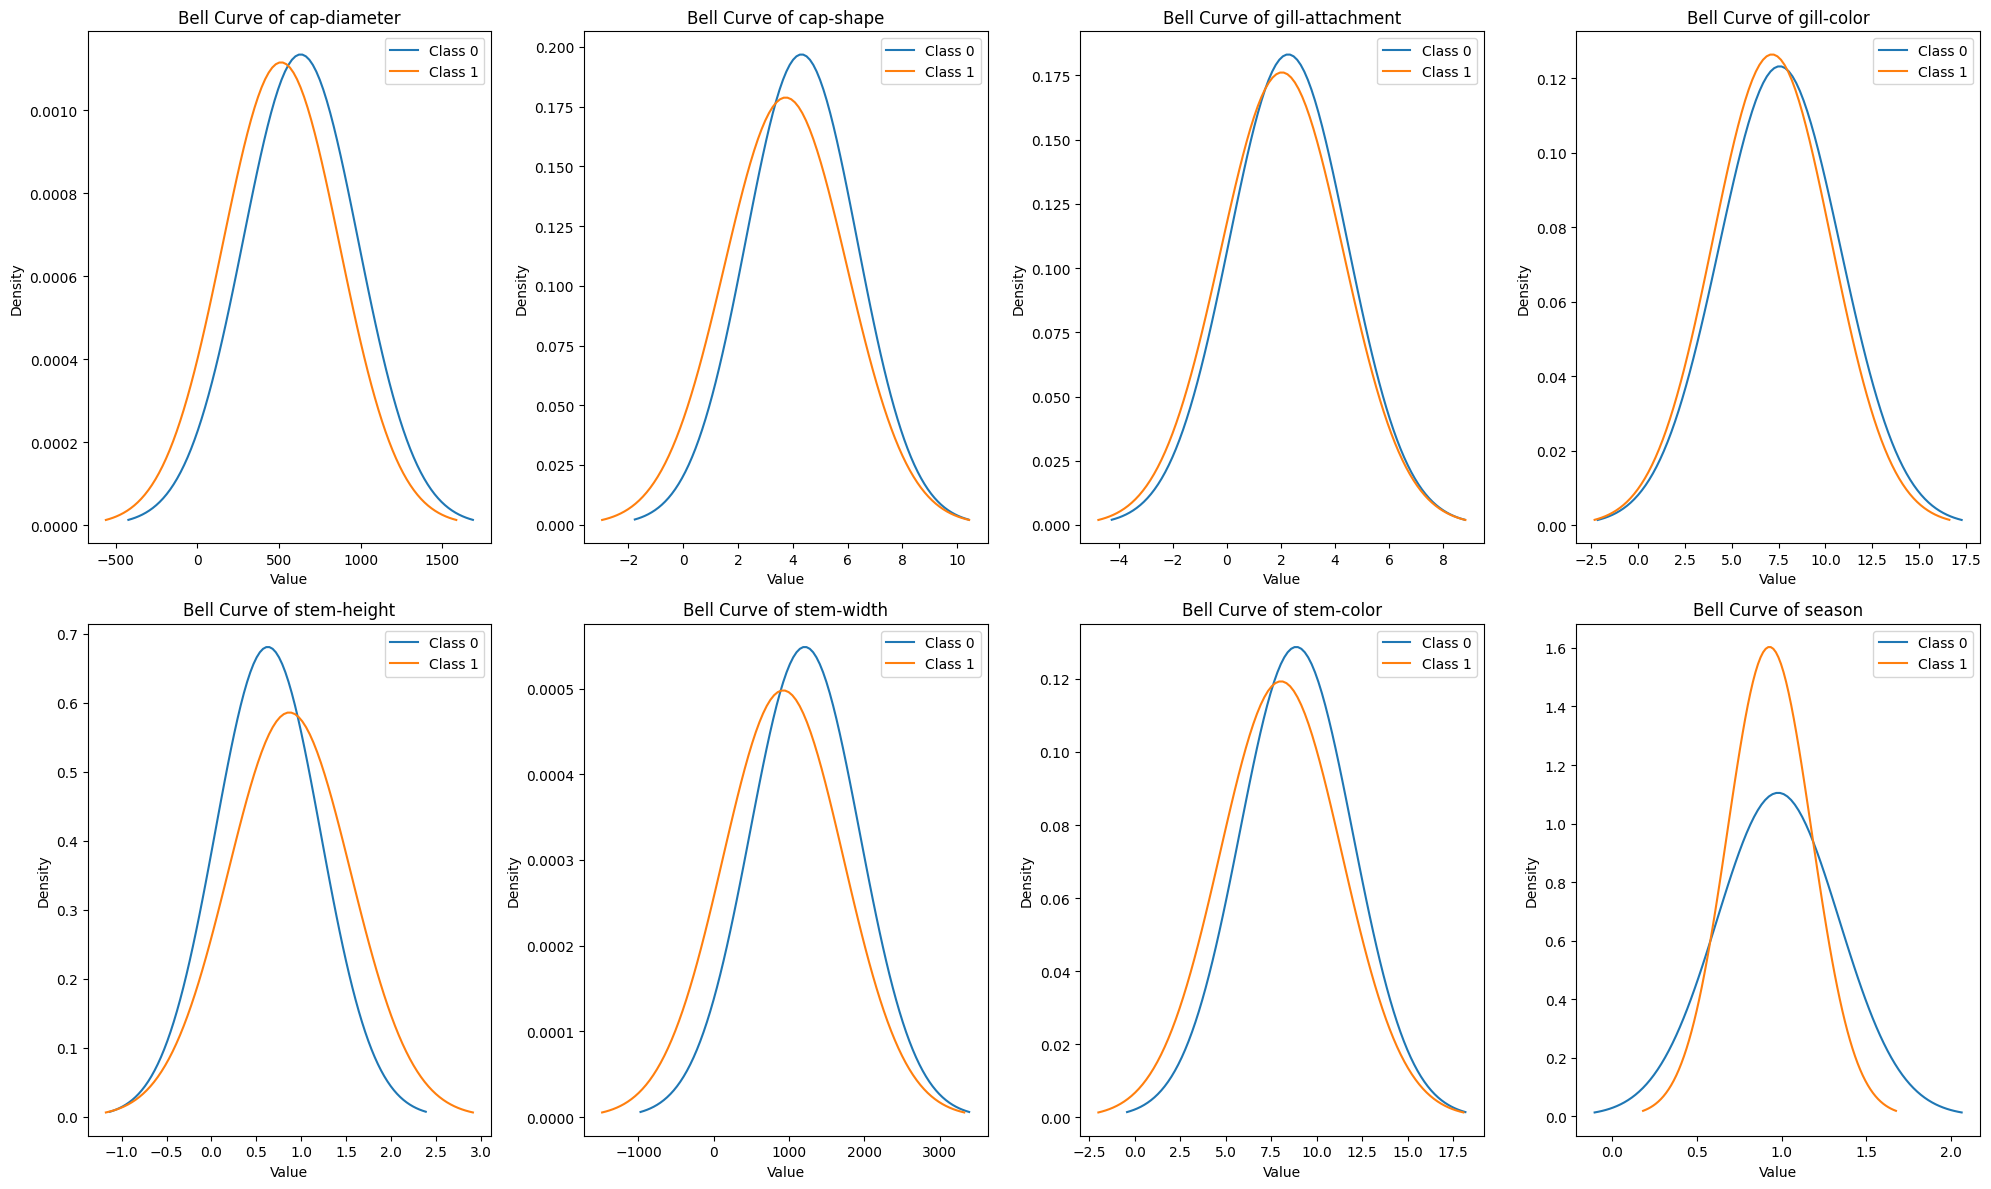

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df contains your data and 'class' is a column representing different classes

# Get the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 4

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12))

# Flatten the axes array to iterate over all subplots
axes = axes.flatten()

# Loop through each column
for i, col in enumerate(X.columns):
    # Extract data for the current column
    data = df[col]
    
    # Set the current subplot
    ax = axes[i]
    
    # Plot bell curve for each class
    for class_label, class_data in df.groupby('class'):
        # Calculate mean and standard deviation for the current class
        mean = np.mean(class_data[col])
        std_dev = np.std(class_data[col])
        
        # Generate x values for the bell curve
        x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
        
        # Calculate probability density function for the bell curve
        p = np.exp(-(x - mean)**2 / (2 * std_dev**2)) / (std_dev * np.sqrt(2 * np.pi))
        
        # Plot bell curve
        ax.plot(x, p, label=f'Class {class_label}')
    
    # Show legend
    ax.legend()
    
    # Set title and labels
    ax.set_title(f'Bell Curve of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
